# Regression of Russian Ruble to USD exchange rate to the Brent Spot Price
Below the python script is presented to dowload the dataseries from CBR and EIA. Then a proper figure is ploted.

In [1]:
# python libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# download Ruble Exchange Rate data from the Central Bank RF website
rupath = 'http://www.cbr.ru/Queries/UniDbQuery/DownloadExcel/41392?Posted=True&mode=1&VAL_NM_RQ=R01235&FromDate=01%2F01%2F1990&ToDate=07%2F02%2F2019'

ru_data = pd.read_excel(rupath, index_col=1, parse_datas=True)
del ru_data['nominal']
del ru_data['cdx']

In [3]:
# download Europe Brent Spot Price form the US Energy Information Administration

oil_path = 'https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls'

oil_data = pd.read_excel(oil_path, sheet_name='Data 1', skiprows=2,
                         index_col=0, parse_datas=True)
oil_data.columns = ['usd_per_bar']

In [4]:
# get joined dataset
data = ru_data.join(oil_data)
data = data[(data.index > dt.datetime(2000,1,1))]
data = data.dropna()

# get exchange rate of USD per ruble
data['curs_'] = 1/ data['curs']

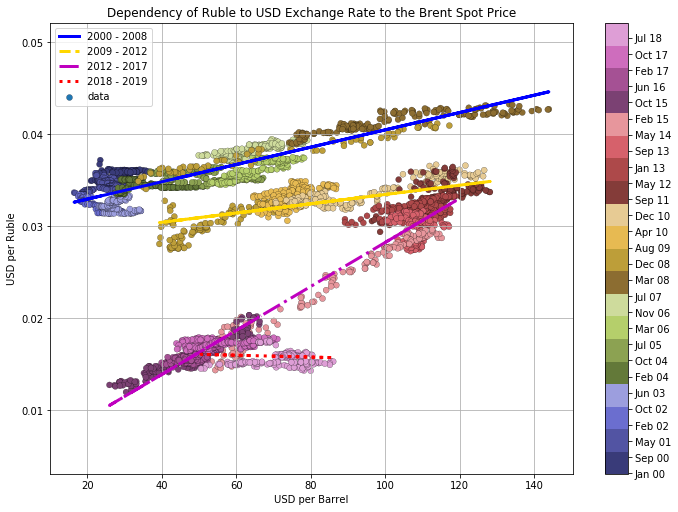

In [5]:
# draw rubble way

mpl_dates = mpl.dates.date2num(list(data.index))

fig = plt.figure(figsize=(11.7, 8.3))
plt.scatter(data['usd_per_bar'], data['curs_'], c=mpl_dates, cmap='tab20b',
            edgecolors='black', linewidths=0.2, label='data')

cut_date0 = dt.datetime(2008, 3, 1)
cut_date1 = dt.datetime(2009, 2, 1)
cut_date2 = dt.datetime(2012, 7, 1)
cut_date3 = dt.datetime(2018, 1, 1)

early_pca = data[data.index < cut_date1]['usd_per_bar']
early_reg = np.polyval(np.polyfit(early_pca,
                                  data['curs_'][data.index < cut_date1],
                                  1), early_pca)

middle_pca = data[(data.index >= cut_date1) &
                  (data.index < cut_date2)]['usd_per_bar']
middle_reg = np.polyval(np.polyfit(middle_pca,
                                   data['curs_'][(data.index >= cut_date1) &
                                                 (data.index < cut_date2)],
                                   1), middle_pca)


late_pca = data[(data.index >= cut_date2) &
                (data.index < cut_date3)]['usd_per_bar']
late_reg = np.polyval(np.polyfit(late_pca,
                                 data['curs_'][(data.index >= cut_date2) &
                                                 (data.index < cut_date3)],
                                 1), late_pca)

too_late_pca = data[data.index >= cut_date3]['usd_per_bar']
too_late_reg = np.polyval(np.polyfit(too_late_pca,
                                     data['curs_'][data.index >= cut_date3],
                                     1), too_late_pca)


plt.plot(early_pca, early_reg, 'b', lw=3, label='2000 - 2008')
plt.plot(middle_pca, middle_reg, 'gold', lw=3, ls='--', label='2009 - 2012')
plt.plot(late_pca, late_reg, 'm', lw=3, ls='-.', label='2012 - 2017')
plt.plot(too_late_pca, too_late_reg, 'r', lw=3, ls=':', label='2018 - 2019')

plt.grid( True)
plt.xlabel('USD per Barrel')
plt.ylabel('USD per Ruble')
plt.title('Dependency of Ruble to USD Exchange Rate to the Brent Spot Price')
plt.legend()

plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%b %y')); #%d %b %y'));

In [6]:
fig.savefig('ruble_way.png');